<a href="https://colab.research.google.com/github/Zaedul-Islam/Kaggle/blob/master/Titanic%20-%20Machine%20Learning%20from%20Disaster/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic: Machine Learning from Disaster**

## **Step 1: Read Train & Test datasets**

In [267]:
# Importing pandas library
#  pandas - The best Python library to import and manage datasets 
import pandas as pd

# Importing Test & Train dataset
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/Titanic - Machine Learning from Disaster/Dataset/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/Titanic - Machine Learning from Disaster/Dataset/test.csv')

## **Step 2: Exploratory Data Analysis**

In [268]:
# Display first 5 rows of train dataset
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [269]:
# Display first 5 rows of train dataset
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Findings:** 
1. Dataset contains both Categorical and Continuous attribute
2. NaN indicates data is missing for that particular cell. That means both the train and test dataset contain missing data




In [270]:
# Figure out the dimensions of train dataset
train.shape

(891, 12)

In [271]:
# Figure out the dimensions of test dataset
test.shape

(418, 11)

In [272]:
# Pints information about a train DataFrame 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Findings:**
1. Huge number of data is missing in **Cabin**  variable. There are also missing values in **Age** and **Embarked** columns.

In [273]:
# Pints information about a test DataFrame 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Findings:**
1. In the test dataset, huge number of data is missing in **Cabin**  variable as well. There are also missing values in **Age** and **Fare** columns.

In [274]:
# To ge the number of missing values in each column of train dataset
# 'isnull()' detect missing values. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values
# Finally, 'sum()' summing up the missing values in each column
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [275]:
# To ge the number of missing values in each column of test dataset
# 'isnull()' detect missing values. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values
# Finally, 'sum()' summing up the missing values in each column
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## **Step 3: Data Visualization**

In [276]:
# Importing 'matplotlib' library
#  matplotlib - The Python library is needed to plot nice charts
import matplotlib.pyplot as plt

# To accomodate visualization charts in Jupyter Notebook 'inline' method is introduced
%matplotlib inline

# Importing 'seaborn' library
# 'seaborn' - a matplotlib based statistical graphical library
import seaborn as sns
sns.set()

### **First draw bar charts on Categorical features**
1. Sex
2. SibSp
3. Parch
4. Pclass
5. Cabin
6. Embarked




In [277]:
def drawBarChart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

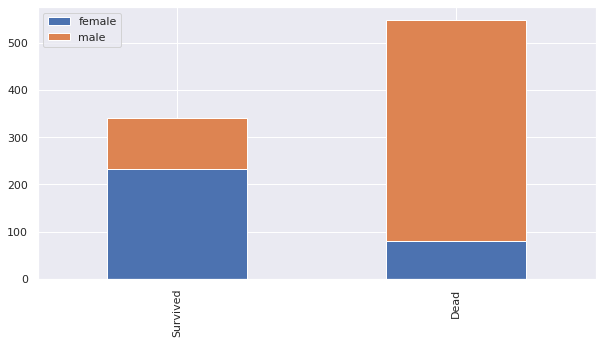

In [278]:
drawBarChart('Sex')

**Findings:**
1.  More female were survived that male in the titanic ship

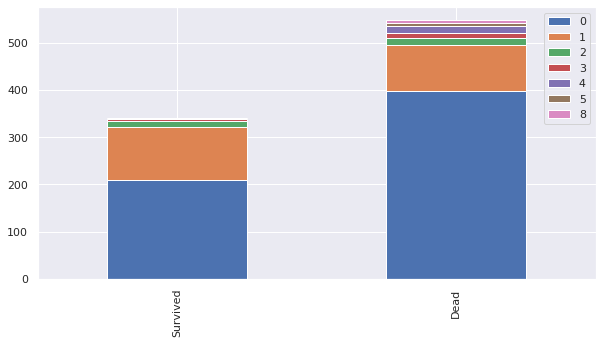

In [279]:
drawBarChart('SibSp')

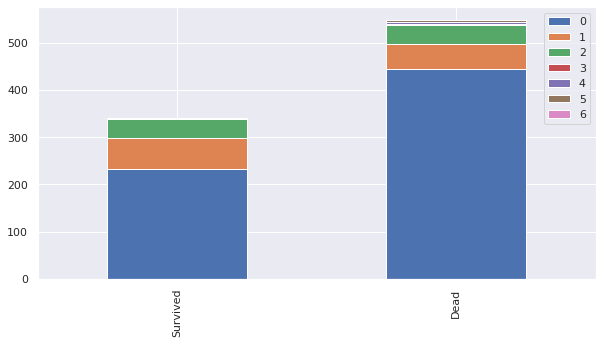

In [280]:
drawBarChart('Parch')

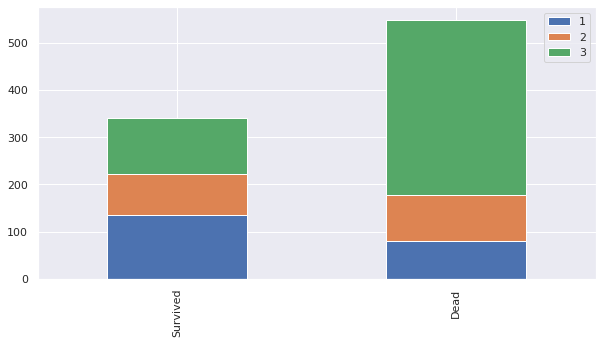

In [281]:
drawBarChart('Pclass')

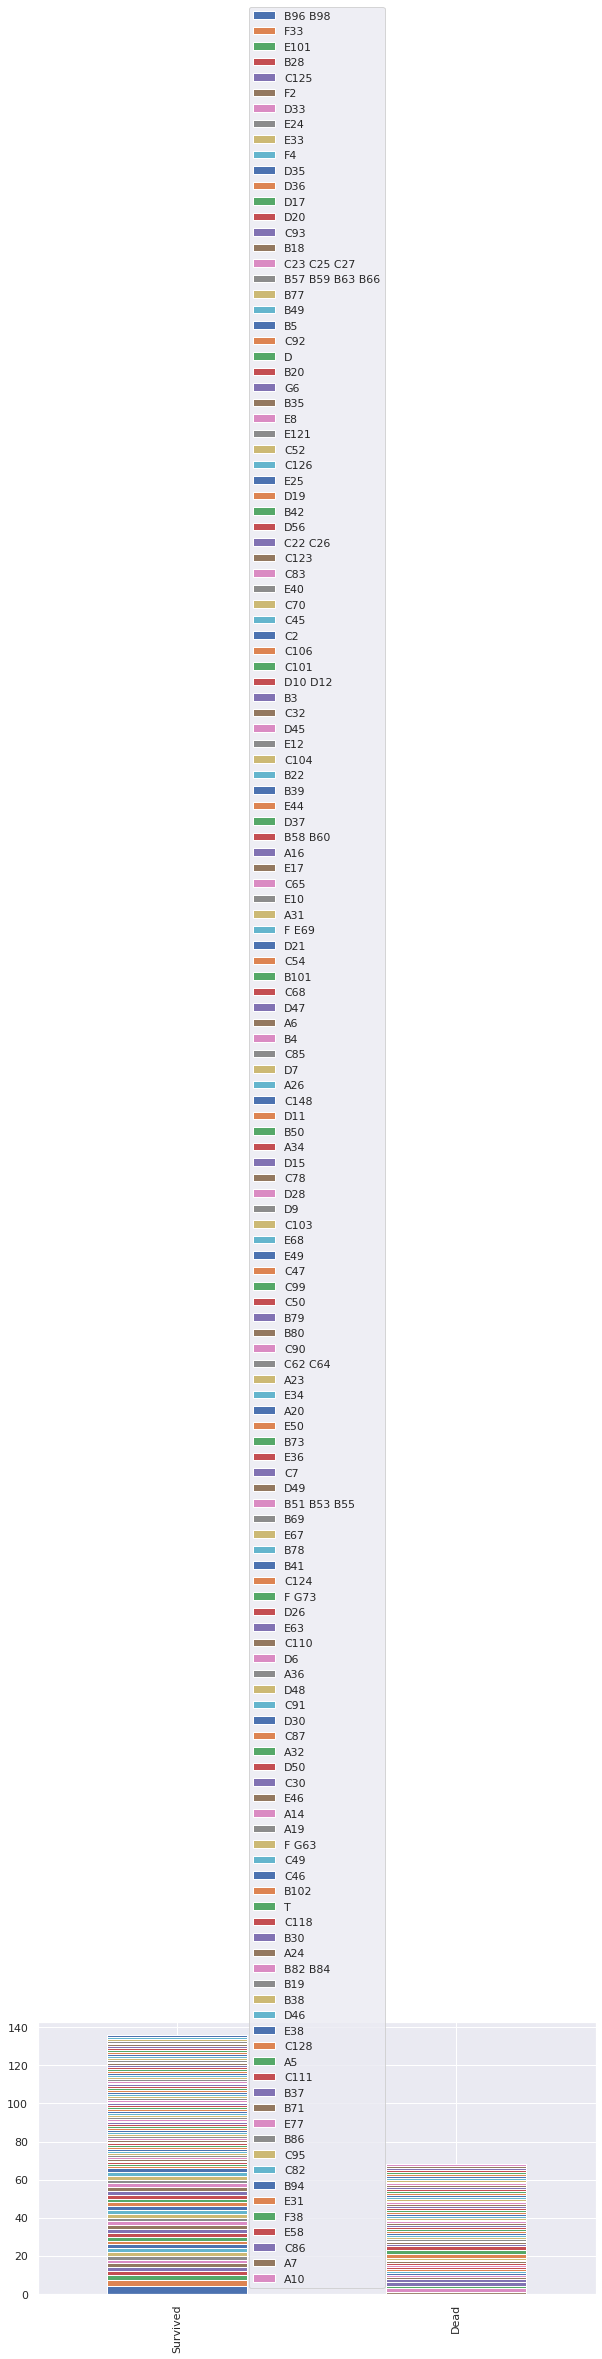

In [282]:
drawBarChart('Cabin')

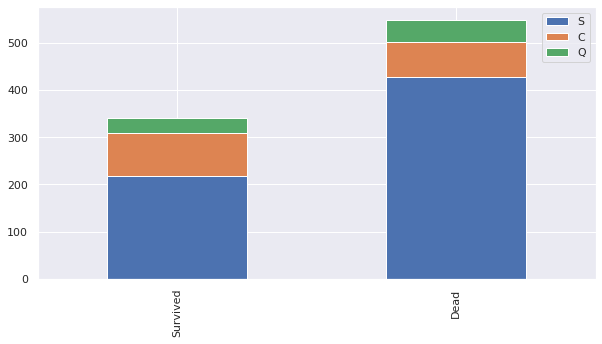

In [283]:
drawBarChart('Embarked')

## **Step 4: Feature Engineering**

### **1. Name**

In [284]:
# Add a new column called 'Title' to both 'train' & 'test' datasets from the corresponding 'Name' columns
# 'Title' column contains only the title for the person
trainTestDatasets = [train, test]

for dataset in trainTestDatasets:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [285]:
# Show the counts of 'Title' attribute of 'Train' dataset
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Ms            1
Lady          1
Mme           1
Sir           1
Don           1
Jonkheer      1
Countess      1
Capt          1
Name: Title, dtype: int64

In [286]:
# Show the counts of 'Title' attribute of 'Test' dataset
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

**Map title to numbers**
* Mr: 0
* Miss: 1
* Mrs: 2
* Others: 3

In [287]:
titleMapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in trainTestDatasets:
    dataset['Title'] = dataset['Title'].map(titleMapping)

In [288]:
# Observe the 'Title' variable in 'Train' dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [289]:
# Observe the 'Title' variable in 'Test' dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


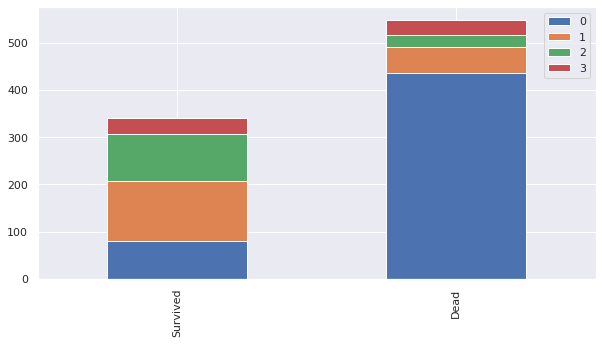

In [290]:
drawBarChart('Title')

In [291]:
# Delete unnecessary feature (i.e. 'Name') from both the 'Train' & 'Test' datasets
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [292]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [293]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


### **2. Sex**

**Map Sex attribute to numbers as follows**
* male: 0
* female: 1



In [294]:
sexMapping = {"male": 0, "female": 1}

for dataset in trainTestDatasets:
    dataset['Sex'] = dataset['Sex'].map(sexMapping)

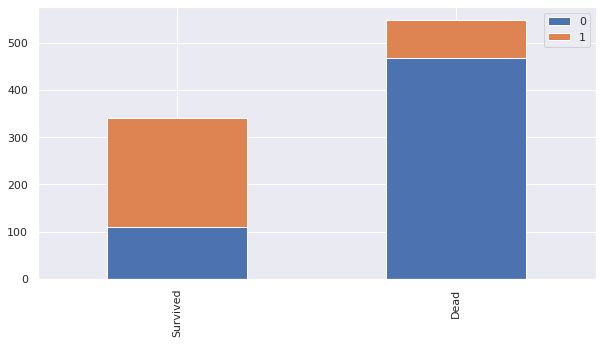

In [295]:
drawBarChart('Sex')

### **3. Age**

**3.1. Filling up missing data by taking the average of goup Title**

Fill up the missing values in each cell of **Age** column by the taking the average age of corresponding group **Title**. This will facilitate the **Random Forest Ensemble Classifier**. **Age** is one of the most important classifiers here.

In [296]:
# Fill missing ages with median age for each title (Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace = True)

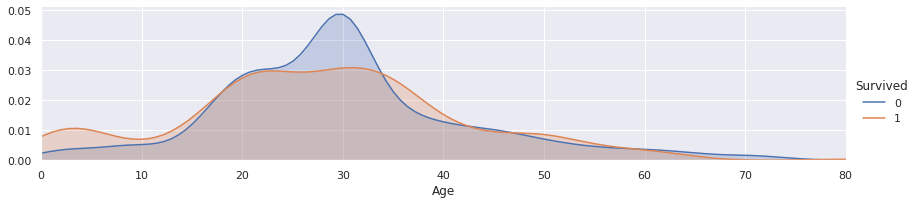

In [297]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)

# Taking the maximum age as highest limit
facet.set(xlim = (0, train['Age'].max()))

facet.add_legend()

plt.show()

**Findings:**
1. From the graph, most of the passengers died were of age *30*
2. Most of the passengers survived were of age between *20 to 34*


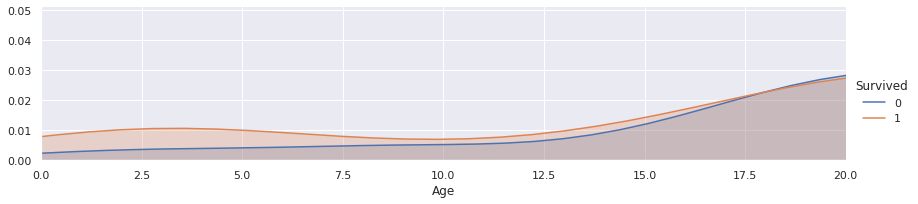

In [298]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()

# Plotting the age range between 0 to 20
plt.xlim(0, 20)

plt.show()

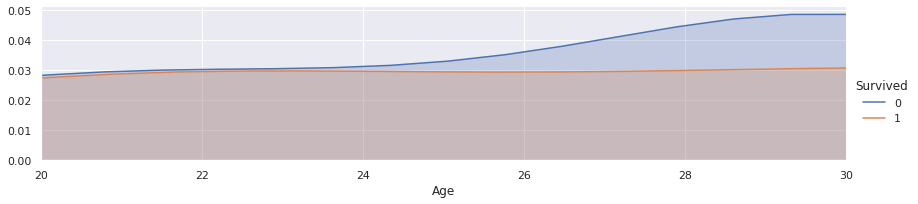

In [299]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

# Plotting the age range between 20 to 30
plt.xlim(20, 30)

plt.show()

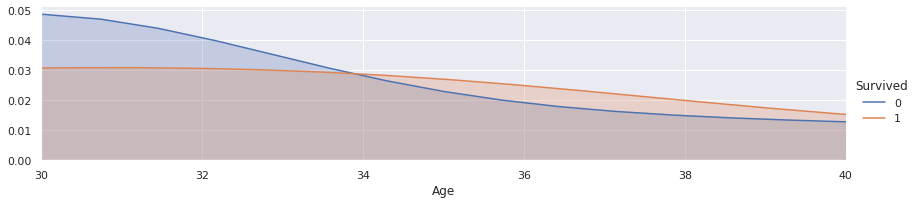

In [300]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

# Plotting the age range between 30 to 40
plt.xlim(30, 40)

plt.show()

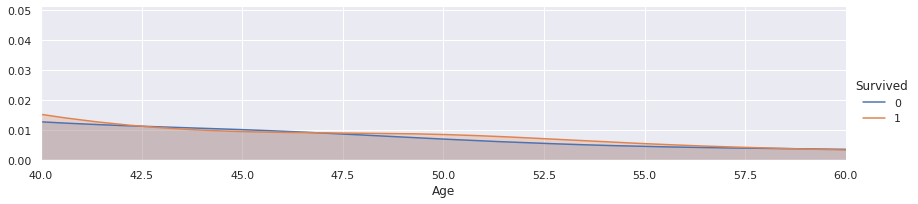

In [301]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

# Plotting the age range between 40 to 60
plt.xlim(40, 60)

plt.show()

In [302]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [303]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


**Findings:**
1. No more missing values in both Train & Test dataset

**3.2. Dividing ages into 5 different categories**

Converting Age to Catergorical value from Continuous value

1. Child: 0 (age <= 16)
2. Young: 1 (age > 16 && age <= 26)
3. Adult: 2 (age > 26 && age <= 36)
4. Mid-age: 3 (age > 36 && age <= 62) 
5. Senior: 4 (age > 62)

In [304]:
for dataset in trainTestDatasets:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4,

In [305]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


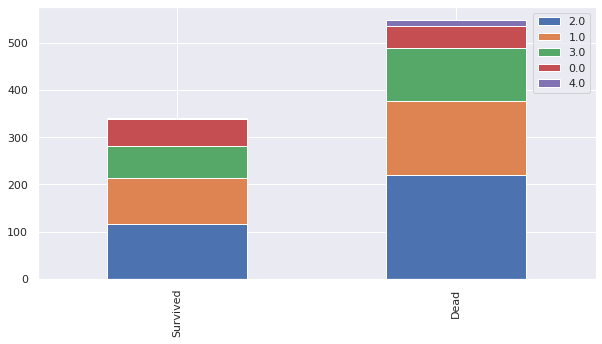

In [306]:
drawBarChart('Age')

### **4. Embarked**

**4.1. Filling up missing data**


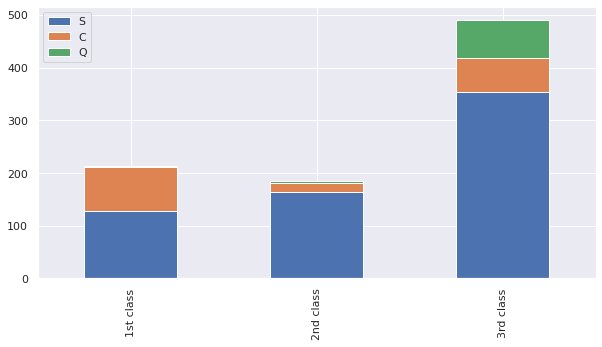

In [307]:
# Southampton
pClass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
pClass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
pClass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()

df = pd.DataFrame([pClass1, pClass2, pClass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

**Findings:**
1. From the chart, it's clearly visible that most of the 1st, 2nd and 3rd class passengers embarked at the Southampton port. It's amost 50% of total embarked passengers.



In [308]:
# Fill up the missing data of Embarked by Southampton -> 'S' in both train and test datasets
for dataset in trainTestDatasets:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [309]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


**4.2. Map port name to numerical values**
1. 'S': 0
2. 'C': 1
3. 'Q': 2

In [310]:
embarkedMapping = {'S': 0, 'C': 1, 'Q': 2}
for dataset in trainTestDatasets:
    dataset['Embarked'] = dataset['Embarked'].map(embarkedMapping)

In [311]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


### **5. Fare**

**5.1. Filling up missing data**


In [312]:
# Fill missing Fare with median fare for each Pclass
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace = True)
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


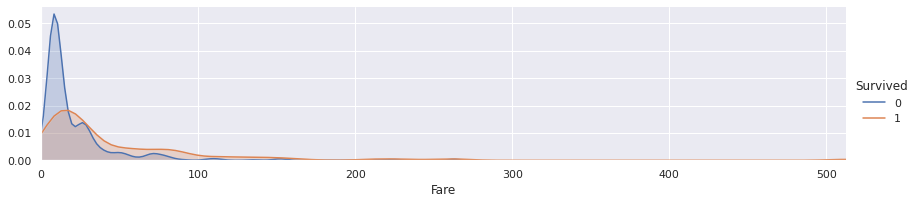

In [313]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

**Findings:**
1. From the chart, the passengers whose ticket fare was between 0 to 100, they were unlucky to survive.

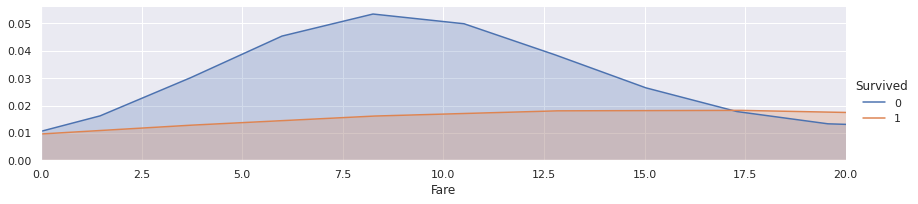

In [314]:
# Ploting the Fare ranging from 0 to 20
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.xlim(0, 20)

plt.show()

**Findings:**
1. Those who bought ticket aroung $8 were unluckiest ones to survive

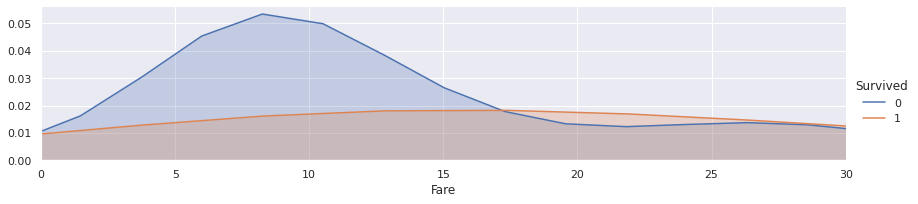

In [315]:
# Ploting the Fare ranging from 0 to 30
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.xlim(0, 30)

plt.show()

**Findings:**
1. Those who bought ticket between 13 dollars to 19 dollars were luckiest ones to survive.

**5.2. Map Fare column to categorical values**
1. Fare <= 17: 0
2. Fare > 17 && Fare <= 30: 1
3. Fare > 30 && Fare <= 100: 2
4. Fare > 100: 3

In [316]:
for dataset in trainTestDatasets: 
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3

In [317]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### **6. Cabin**

In [318]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
D              3
              ..
C110           1
B50            1
A34            1
C85            1
E10            1
Name: Cabin, Length: 147, dtype: int64

In [319]:
# We are only interested in the first letter of the cabin(i.e. C in C23/B in B96) as it 
# gives an idea of its class
for dataset in trainTestDatasets:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

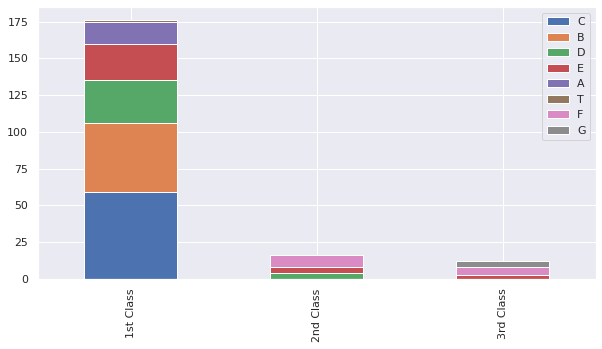

In [320]:
passengerClass1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
passengerClass2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
passengerClass3 = train[train['Pclass'] == 3]['Cabin'].value_counts()

df = pd.DataFrame([passengerClass1, passengerClass2, passengerClass3])
df.index = ['1st Class', '2nd Class', '3rd Class']
df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

**Findings:**
1. Only 1st Class contains of cabin A, B, C.

In [321]:
cabinMapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in trainTestDatasets:
    dataset['Cabin'] = dataset['Cabin'].map(cabinMapping)

In [322]:
# Fill mising 'Cabin' with median 
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace = True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace = True)

In [323]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


### **7. No. of Family Members**

In [324]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

(0.0, 11.0)

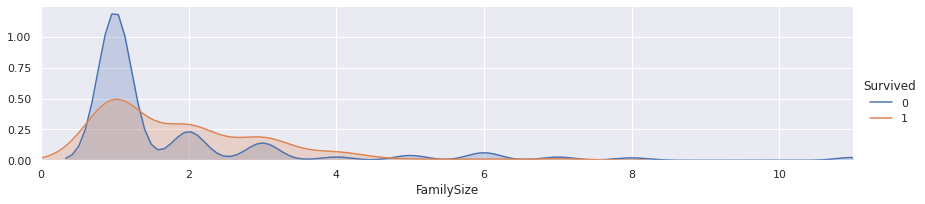

In [325]:
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade= True)
facet.set(xlim = (0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

**Findings**:
1.   The persons who happen to aboard the Titanic died mostly



In [326]:
familyMapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in trainTestDatasets:
    dataset['FamilySize'] = dataset['FamilySize'].map(familyMapping)

**Removing Unnecessary Variables**

In [327]:
featuresToDrop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(featuresToDrop, axis = 1)
test = test.drop(featuresToDrop, axis = 1)
train = train.drop(['PassengerId'], axis = 1)


In [328]:
trainData = train.drop('Survived', axis = 1)
target = train['Survived']

trainData.shape, target.shape

((891, 8), (891,))

In [329]:
# After finishing Feature Engineering
trainData.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


## **Step 5: Model Training**

In [330]:
# Importing Classifier modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

In [331]:
# To check no missing is present in the dataset now
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


## **5. 1 10-Fold Cross Validation**

In [332]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kFold = KFold(n_splits = 10, shuffle = True, random_state = 0)

## **5.2 Decision Tree**

In [334]:
decisionTreeClassifier = DecisionTreeClassifier()
score = cross_val_score(decisionTreeClassifier, trainData, target, cv = kFold, n_jobs = 1, scoring = 'accuracy')
print(score)

[0.76666667 0.83146067 0.76404494 0.7752809  0.8988764  0.7752809
 0.83146067 0.82022472 0.74157303 0.79775281]


In [335]:
# Decision Tree score
round(np.mean(score) * 100, 2)

80.03

## **5.3 Random Forest**

In [337]:
randomForestClassifier = RandomForestClassifier(n_estimators=13)
score = cross_val_score(randomForestClassifier, trainData, target, cv = kFold, n_jobs = 1, scoring = 'accuracy')
print(score)

[0.8        0.83146067 0.79775281 0.79775281 0.87640449 0.80898876
 0.83146067 0.80898876 0.7752809  0.83146067]


In [338]:
# Random Forest Score
round(np.mean(score) * 100, 2)

81.6

## **6. Uploading to kaggle**

In [340]:
randomForestClassifier = RandomForestClassifier(n_estimators = 13)
randomForestClassifier.fit(trainData, target)

testData = test.drop('PassengerId', axis = 1).copy()
prediction = randomForestClassifier.predict(testData)

In [341]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': prediction
})

submission.to_csv('submission.csv', index = False)

In [342]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
